# [선형 회귀](https://brunch.co.kr/@cookery/99)
- 단순 선형 회귀식
$$
\hat{y} = wx + b
$$
- 선형회귀에서는 가중치($w$)와 절편($b$)을 평균제곱오차 (Mean Squared Error - MSE)를 최소화하는 방법으로 구할 수 있다.
$$
MSE = {1 \over N}\sum(\hat{y_i} - y_i)^2
$$

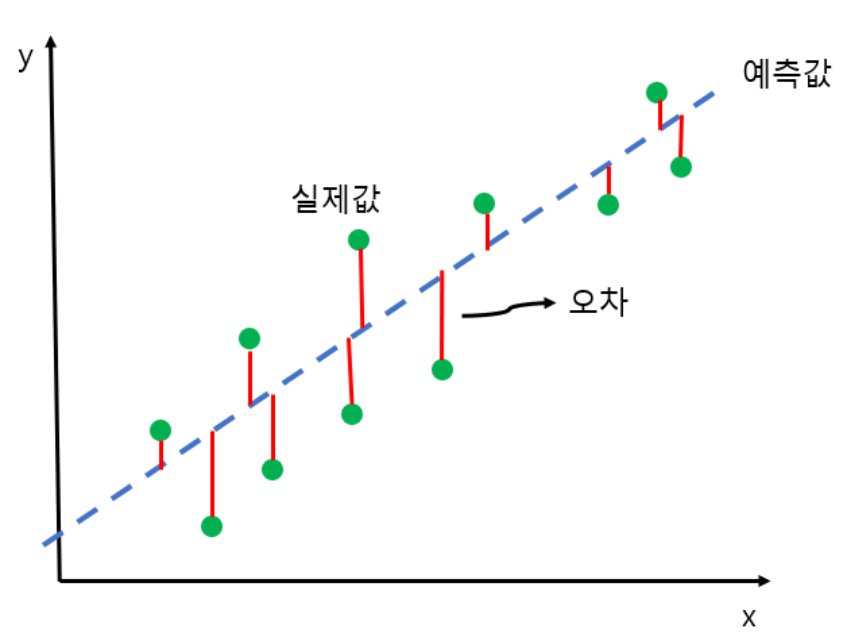

# 손실함수

- ${1 \over N}\sum(\hat{y_i} - y_i)^2$에서
  - ${1 \over N}\sum$는 평균을 의미하고,
  - $(\hat{y_i} - y_i)^2$는 손실함수를 의미한다. 아래는 손실함수 그래프이다.
  - 모델이 학습을 한다는 뜻은 손실함수의 값을 작게 변하도록 학습을 진행하는 것이라고도 볼 수 있다.

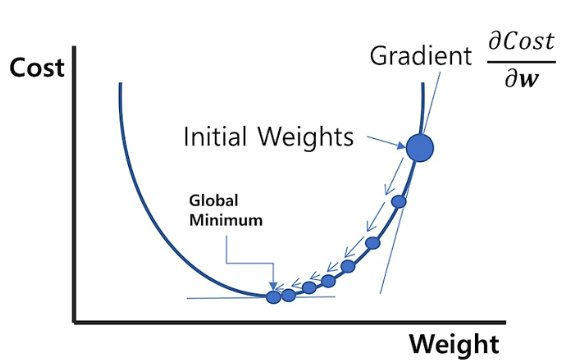

- $\hat{y}$: 예측값 / $y$: 실제값
- $w$: 기울기 / $b$: y절편
- 선형회귀모델: $\hat{y} = wx + b $
- MSE = ${1 \over N}\sum(\hat{y_i} - y_i)^2$

이때, $w$의 최소값을 구하는 방법은?
1. MSE = ${1 \over N}\sum(\hat{y_i} - y_i)^2$
2. => ${1 \over N}\sum(wx + b - y_i)^2$
3. 미분(w) => $\frac{d}{dw}({1 \over N}\sum(wx + b - y_i)^2)$
4. $w$의 gradient => $2{1 \over N}\sum(wx + b - y_i)x$
5. learning_rate: w의 gradient를 업데이트할때, 얼마나 업데이트를 할지 정의하는 변수
6. 실제로 업데이트할 $w$의 gradient는
> - learning_rate * $2{1 \over N}\sum(\hat{y_i} - y_i)x$입니다.
> - $2{1 \over N}\sum$는 평균으로 해석할 수 있으므로,
> - Learning Rate * 평균((Y예측 - Y실제) * X)로 해석할 수 있다.

# Learning Rate(step size)
- Learning Rate가 너무 작으면, 학습이 오래걸리고,
- Learning Rate가 너무 크면, 학습이 되지 않을 수 있습니다.

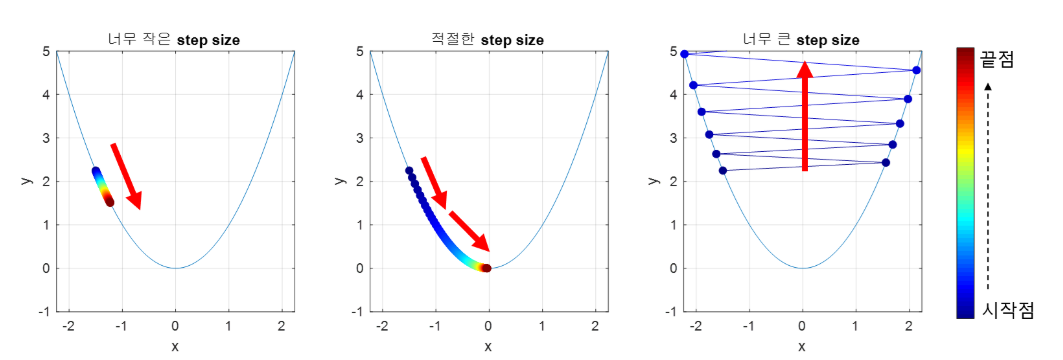

# 코드 구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.rand(100) # features
Y = 0.3 * X + 1.5 # target

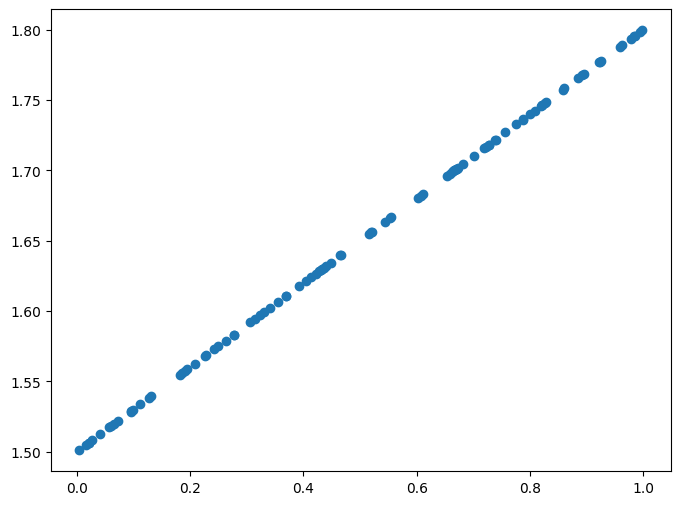

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.show()

In [5]:
def plot_prediction(pred, y, W, b):
  plt.figure(figsize=(8,6))
  plt.scatter(X, y) # 실제값과 독립변수에 대한 그래프
  plt.scatter(X, pred) # 예측값과 독립변수에 대한 그래프
  plt.title(f"W: {W} / b: {b}") # W: 기울기 & b: y축 절편
  plt.show()

### Gradient Descent 구현
- W(기울기): Learning Rate * 평균((Y예측 - Y실제) * X)
- b(Y절편): Learning Rate * 평균((Y예측 - Y실제) * 1)

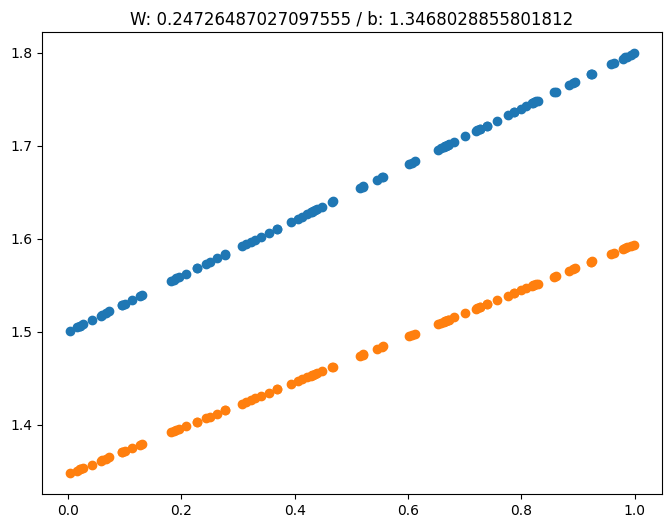

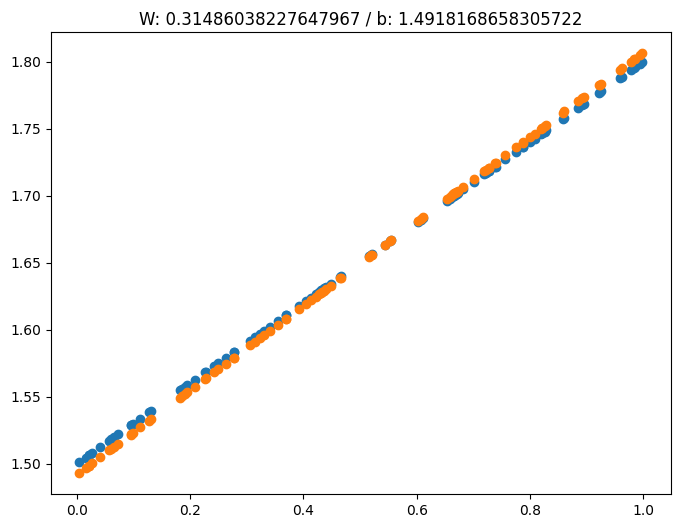

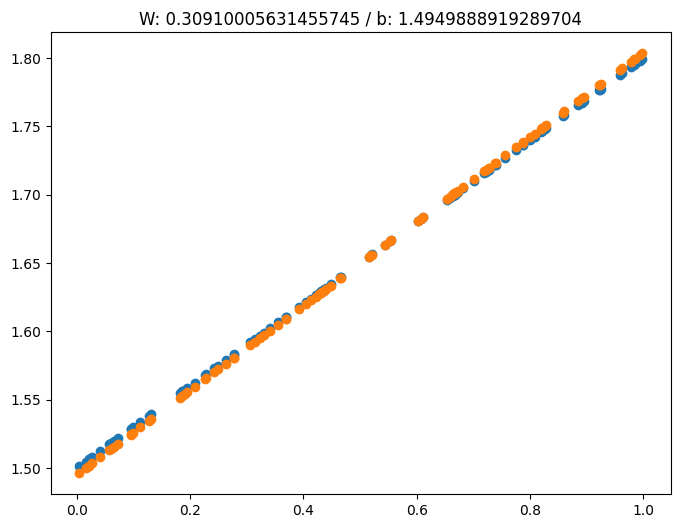

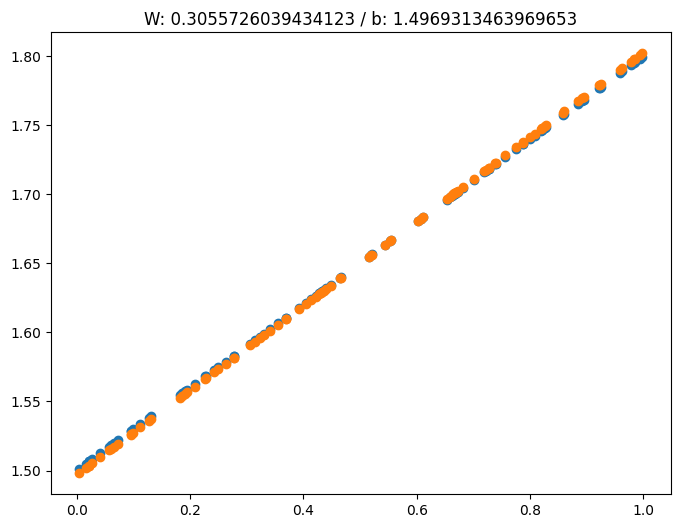

In [6]:
W = np.random.uniform(-1, 1) # 초기 기울기 값: 렌덤
b = np.random.uniform(-1, 1) # 초기 절편 값: 렌덤
learning_rate = 0.7

for epoch in range(200): # 총학습 수: 200
  Y_pred = W * X + b # (선형회귀 모델)모델의 예측값

  error = np.abs(Y_pred - Y).mean() # 모델의 예측값과 실제값의 차이(오차)를 구함.

  if error < 0.001: # 오차의 평균이 0.001 미만이면, 학습완료!!
    break

  # gradient descent
  w_grad = learning_rate * ((Y_pred - Y)*X).mean()
  b_grad = learning_rate * ((Y_pred - Y)*1).mean()

  # W, b 값 업데이트
  W = W - w_grad
  b = b - b_grad

  if epoch % 10 == 0:
    Y_pred = W * X + b
    plot_prediction(Y_pred, Y, W, b) # 학습 중에 진행하는 것을 보여주는 함수